# LA Dodgers batting: Visualize season-level batting statistics
> This notebook reads our archive of team batting statistics for analysis and visualization.

---

#### Import Python tools and Jupyter config

In [1]:
import pandas as pd
import jupyter_black
import altair as alt
import altair_stiles as altstiles
from IPython.display import Image, display

In [2]:
jupyter_black.load()
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000
pd.options.display.max_colwidth = None
alt.data_transformers.disable_max_rows()
alt.themes.register("stiles", altstiles.theme)
alt.themes.enable("stiles")

ThemeRegistry.enable('stiles')

---

## Fetch

#### Read archive of aggregated team batting stats by season

In [3]:
stats_df = pd.read_parquet(
    "https://stilesdata.com/dodgers/data/batting/dodgers_team_batting_1958_present.parquet"
)

In [4]:
stats_for_rates = ["h", "2b", "3b", "hr", "rbi", "sb", "cs", "bb", "so"]

In [5]:
for col in stats_for_rates:
    stats_df[f"{col}_rate"] = (
        stats_df[col].astype(int) / stats_df["g"].astype(int)
    ).round(2)

In [6]:
stats_rates_df = stats_df[
    [
        "season",
        "h_rate",
        "2b_rate",
        "3b_rate",
        "hr_rate",
        "rbi_rate",
        "sb_rate",
        "cs_rate",
        "bb_rate",
        "so_rate",
    ]
].copy()

In [40]:
stats_long_df = pd.melt(
    stats_df,
    id_vars=["season"],
    value_vars=[
        "h_rate",
        "2b_rate",
        "3b_rate",
        "hr_rate",
        "rbi_rate",
        "sb_rate",
        # "cs_rate",
        "bb_rate",
        "so_rate",
    ],
    var_name="statistic",
    value_name="rate_per_game",
).copy()

In [41]:
stats_map = {
    "h_rate": "Hits",
    "2b_rate": "Doubles",
    "3b_rate": "Triples",
    "hr_rate": "Home runs",
    "rbi_rate": "RBIs",
    "sb_rate": "Stolen bases",
    # "cs_rate": "Caught stealing",
    "bb_rate": "Walks",
    "so_rate": "Strikeouts",
}

In [42]:
stats_long_df["statistic_name"] = stats_long_df["statistic"].map(stats_map)

#### Heat map of each stat with independent scales

In [52]:
chart = (
    alt.Chart(stats_long_df, padding={"left": 5})
    .mark_rect()
    .encode(
        x=alt.X(
            "season:O", axis=alt.Axis(values=["1960", "1980", "2000", "2020"]), title=""
        ),
        color=alt.Color(
            "rate_per_game:Q", scale=alt.Scale(scheme="blues"), legend=None
        ),
        facet=alt.Facet(
            "statistic_name:O",
            columns=2,
            header=alt.Header(
                title=None,  # Omitting the title for the facets, if not required
                labelFont="Arial",  # Specifying font type for the labels
                labelFontSize=12,  # Increasing font size for the labels
                # labelOrient="top",  # Optional: can specify label orientation
            ),
        ),
    )
    .properties(
        # title="",
        title={
            "text": ["Select batting categories: Rate per game, over time"],
            "subtitle": [
                "Darker shades represent higher rates for each statistics",
            ],
        },
        width=300,
        height=40,
    )
    .resolve_scale(color="independent")
)

In [53]:
chart.save("../visuals/batting_rates.png", scale_factor=2)

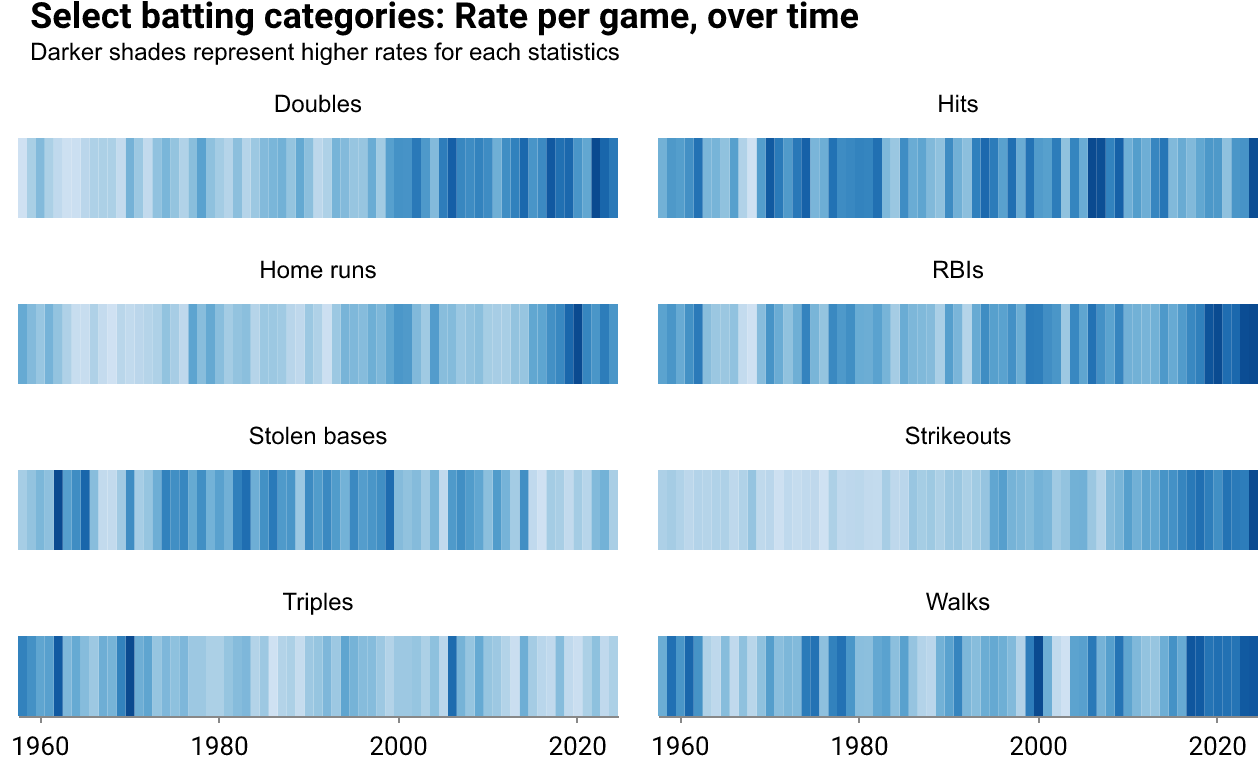

In [54]:
display(Image("../visuals/batting_rates.png", width=650))

---

In [13]:
!jupyter nbconvert --to script --no-prompt --output ../04_viz_batting 04_viz_batting.ipynb

[NbConvertApp] Converting notebook 06-viz-team-batting-statistics.ipynb to script
[NbConvertApp] Writing 3249 bytes to ../03_viz_team_batting_statistics.py
